In [49]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

In [50]:
import pandas as pd
from textblob import TextBlob

df = pd.read_csv('tweetsUsuariosBancoPichincha.csv')
df = pd.read_excel(r"C:\Users\Alexander Dueñas\Documents\GitHub\Natural-Language-Processing\tweetsUsuariosBancoPichincha.xlsx", sheet_name='tweetsUsuariosBancoPichincha')

In [51]:
df.insert(
    loc=4,
    column='TweetEN',
    value=[str(TextBlob(df['Tweet'][i]).translate(from_lang="es", to="en")) for i in df.index]
)

In [52]:
df.insert(
    loc=5,
    column='Tags',
    value=[TextBlob(df['TweetEN'][i]).tags for i in df.index]
)

In [53]:
#The polarity score is a float within the range [-1.0, 1.0].
df.insert(
    loc=6,
    column='Polarity',
    value=[TextBlob(df['TweetEN'][i]).sentiment.polarity for i in df.index]
)

In [54]:
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df.insert(
    loc=7,
    column='Subjectivity',
    value=[TextBlob(df['TweetEN'][i]).sentiment.subjectivity for i in df.index]
)

In [55]:
df

,Number,Date,User,Tweet,TweetEN,Tags,Polarity,Subjectivity
0,1,2023-05-26,NaN,El reclamo es de un pago del 3 de Abril que as...,The claim is of a payment of April 3 that appe...,"[(The, DT), (claim, NN), (is, VBZ), (of, IN), ...",0.500000,0.500000
1,2,2023-05-26,NaN,@BancoPichincha no acredita un pago hecho desd...,@Bancopichincha does not prove a payment made ...,"[(@, JJ), (Bancopichincha, NNP), (does, VBZ), ...",-0.300000,0.800000
2,3,2023-05-26,NaN,@BancoPichincha señores. Estamos bloqueados la...,@Bancopichincha gentlemen. We are blocked the ...,"[(@, JJ), (Bancopichincha, NNP), (gentlemen, N...",0.000000,0.000000
3,4,2023-05-26,NaN,Me acaba de pasar lo mismo me cancelan la tarj...,The same thing has just happened to me the car...,"[(The, DT), (same, JJ), (thing, NN), (has, VBZ...",-0.500000,0.562500
4,5,2023-05-26,NaN,TE ODIO @BancoPichincha,I hate you @Bancopichincha,"[(I, PRP), (hate, VBP), (you, PRP), (@, VBP), ...",-0.800000,0.900000
...,...,...,...,...,...,...,...,...
1054,1055,2023-10-29,NaN,¿Qué está haciendo @BancoPichincha con el dine...,What is @Bancopichincha doing with your custom...,"[(What, WP), (is, VBZ), (@, JJ), (Bancopichinc...",0.136364,0.454545
1055,1056,2023-10-17,NaN,Hace dos horas hice una transferencia y aun no...,Two hours ago I did a transfer and it is not y...,"[(Two, CD), (hours, NNS), (ago, IN), (I, PRP),...",0.600000,0.800000
1056,1057,2023-10-18,NaN,"El sistema bancario del EC es terrible, son ab...","The EC banking system is terrible, they are ab...","[(The, DT), (EC, NNP), (banking, NN), (system,...",-0.025000,0.606250
1057,1058,2023-10-19,NaN,@superbancosEC no es el primer caso. Este fin ...,@superbancosec is not the first case. This wee...,"[(@, NN), (superbancosec, NN), (is, VBZ), (not...",0.193182,0.416667


In [56]:
from statistics import mean

NPS = mean(df['Polarity']) * 100
print('El NPS obtenido es de: ', str(NPS) + ' %')

El NPS obtenido es de:  0.9943630155620492 %


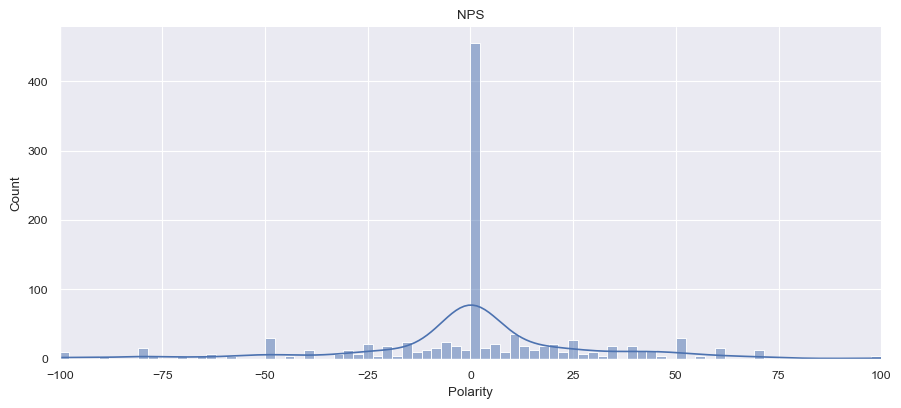

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context("paper")
sns.displot(df['Polarity']*100, kde=True, height=4, aspect=9/4).set(title="NPS")
plt.xlim(-100, 100)
plt.show()

In [58]:
df['TweetLabel'] = df['Polarity'].apply(lambda x: 'Negative' if x < 0 else ('Neutral' if x == 0 else 'Positive'))

In [59]:
df

,Number,Date,User,Tweet,TweetEN,Tags,Polarity,Subjectivity,TweetLabel
0,1,2023-05-26,NaN,El reclamo es de un pago del 3 de Abril que as...,The claim is of a payment of April 3 that appe...,"[(The, DT), (claim, NN), (is, VBZ), (of, IN), ...",0.500000,0.500000,Positive
1,2,2023-05-26,NaN,@BancoPichincha no acredita un pago hecho desd...,@Bancopichincha does not prove a payment made ...,"[(@, JJ), (Bancopichincha, NNP), (does, VBZ), ...",-0.300000,0.800000,Negative
2,3,2023-05-26,NaN,@BancoPichincha señores. Estamos bloqueados la...,@Bancopichincha gentlemen. We are blocked the ...,"[(@, JJ), (Bancopichincha, NNP), (gentlemen, N...",0.000000,0.000000,Neutral
3,4,2023-05-26,NaN,Me acaba de pasar lo mismo me cancelan la tarj...,The same thing has just happened to me the car...,"[(The, DT), (same, JJ), (thing, NN), (has, VBZ...",-0.500000,0.562500,Negative
4,5,2023-05-26,NaN,TE ODIO @BancoPichincha,I hate you @Bancopichincha,"[(I, PRP), (hate, VBP), (you, PRP), (@, VBP), ...",-0.800000,0.900000,Negative
...,...,...,...,...,...,...,...,...,...
1054,1055,2023-10-29,NaN,¿Qué está haciendo @BancoPichincha con el dine...,What is @Bancopichincha doing with your custom...,"[(What, WP), (is, VBZ), (@, JJ), (Bancopichinc...",0.136364,0.454545,Positive
1055,1056,2023-10-17,NaN,Hace dos horas hice una transferencia y aun no...,Two hours ago I did a transfer and it is not y...,"[(Two, CD), (hours, NNS), (ago, IN), (I, PRP),...",0.600000,0.800000,Positive
1056,1057,2023-10-18,NaN,"El sistema bancario del EC es terrible, son ab...","The EC banking system is terrible, they are ab...","[(The, DT), (EC, NNP), (banking, NN), (system,...",-0.025000,0.606250,Negative
1057,1058,2023-10-19,NaN,@superbancosEC no es el primer caso. Este fin ...,@superbancosec is not the first case. This wee...,"[(@, NN), (superbancosec, NN), (is, VBZ), (not...",0.193182,0.416667,Positive


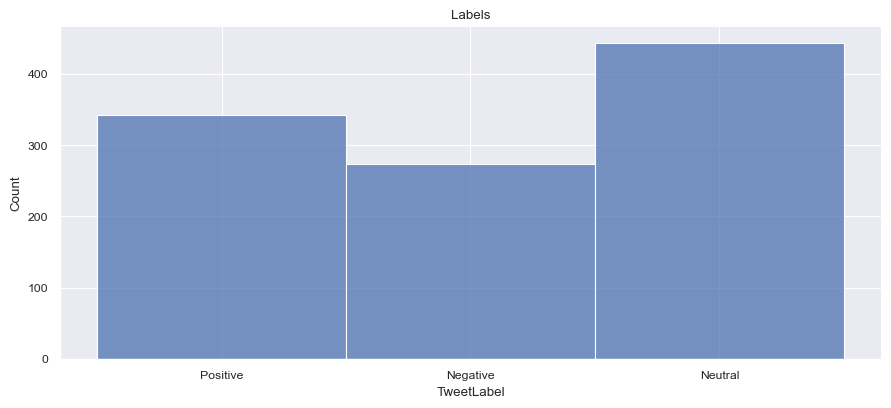

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context("paper")
sns.displot(df['TweetLabel'], height=4, aspect=9/4).set(title="Labels")
plt.show()

In [61]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sent = SentimentIntensityAnalyzer()
df.insert(
    loc=9,
    column='Vader',
    value=[sent.polarity_scores(df['TweetEN'][i]) for i in df.index]
)

[nltk_data] Downloading package vader_lexicon to C:\Users\Alexander
[nltk_data]     Dueñas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
df['VaderCompound'] = [d['compound'] for d in df['Vader']]

In [63]:
df

,Number,Date,User,Tweet,TweetEN,Tags,Polarity,Subjectivity,TweetLabel,Vader,VaderCompound
0,1,2023-05-26,NaN,El reclamo es de un pago del 3 de Abril que as...,The claim is of a payment of April 3 that appe...,"[(The, DT), (claim, NN), (is, VBZ), (of, IN), ...",0.500000,0.500000,Positive,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.5795
1,2,2023-05-26,NaN,@BancoPichincha no acredita un pago hecho desd...,@Bancopichincha does not prove a payment made ...,"[(@, JJ), (Bancopichincha, NNP), (does, VBZ), ...",-0.300000,0.800000,Negative,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",-0.9274
2,3,2023-05-26,NaN,@BancoPichincha señores. Estamos bloqueados la...,@Bancopichincha gentlemen. We are blocked the ...,"[(@, JJ), (Bancopichincha, NNP), (gentlemen, N...",0.000000,0.000000,Neutral,"{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'comp...",-0.2732
3,4,2023-05-26,NaN,Me acaba de pasar lo mismo me cancelan la tarj...,The same thing has just happened to me the car...,"[(The, DT), (same, JJ), (thing, NN), (has, VBZ...",-0.500000,0.562500,Negative,"{'neg': 0.178, 'neu': 0.757, 'pos': 0.065, 'co...",-0.6369
4,5,2023-05-26,NaN,TE ODIO @BancoPichincha,I hate you @Bancopichincha,"[(I, PRP), (hate, VBP), (you, PRP), (@, VBP), ...",-0.800000,0.900000,Negative,"{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...",-0.5719
...,...,...,...,...,...,...,...,...,...,...,...
1054,1055,2023-10-29,NaN,¿Qué está haciendo @BancoPichincha con el dine...,What is @Bancopichincha doing with your custom...,"[(What, WP), (is, VBZ), (@, JJ), (Bancopichinc...",0.136364,0.454545,Positive,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",-0.4019
1055,1056,2023-10-17,NaN,Hace dos horas hice una transferencia y aun no...,Two hours ago I did a transfer and it is not y...,"[(Two, CD), (hours, NNS), (ago, IN), (I, PRP),...",0.600000,0.800000,Positive,"{'neg': 0.056, 'neu': 0.847, 'pos': 0.097, 'co...",0.3233
1056,1057,2023-10-18,NaN,"El sistema bancario del EC es terrible, son ab...","The EC banking system is terrible, they are ab...","[(The, DT), (EC, NNP), (banking, NN), (system,...",-0.025000,0.606250,Negative,"{'neg': 0.137, 'neu': 0.795, 'pos': 0.068, 'co...",-0.4421
1057,1058,2023-10-19,NaN,@superbancosEC no es el primer caso. Este fin ...,@superbancosec is not the first case. This wee...,"[(@, NN), (superbancosec, NN), (is, VBZ), (not...",0.193182,0.416667,Positive,"{'neg': 0.082, 'neu': 0.818, 'pos': 0.1, 'comp...",0.1531


In [64]:
from statistics import mean

NPS = mean(df['VaderCompound']) * 100
print('El NPS obtenido es de: ', str(NPS) + ' %')

El NPS obtenido es de:  -4.674277620396601 %


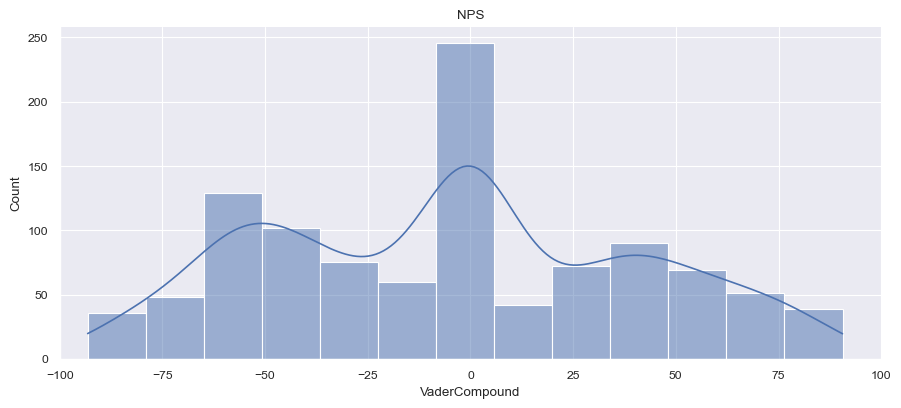

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context("paper")
sns.displot(df['VaderCompound']*100, kde=True, height=4, aspect=9/4).set(title="NPS")
plt.xlim(-100, 100)
plt.show()

In [66]:
df['TweetLabelVader'] = df['VaderCompound'].apply(lambda x: 'Negative' if x < 0 else ('Neutral' if x == 0 else 'Positive'))

In [67]:
df

,Number,Date,User,Tweet,TweetEN,Tags,Polarity,Subjectivity,TweetLabel,Vader,VaderCompound,TweetLabelVader
0,1,2023-05-26,NaN,El reclamo es de un pago del 3 de Abril que as...,The claim is of a payment of April 3 that appe...,"[(The, DT), (claim, NN), (is, VBZ), (of, IN), ...",0.500000,0.500000,Positive,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",-0.5795,Negative
1,2,2023-05-26,NaN,@BancoPichincha no acredita un pago hecho desd...,@Bancopichincha does not prove a payment made ...,"[(@, JJ), (Bancopichincha, NNP), (does, VBZ), ...",-0.300000,0.800000,Negative,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",-0.9274,Negative
2,3,2023-05-26,NaN,@BancoPichincha señores. Estamos bloqueados la...,@Bancopichincha gentlemen. We are blocked the ...,"[(@, JJ), (Bancopichincha, NNP), (gentlemen, N...",0.000000,0.000000,Neutral,"{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'comp...",-0.2732,Negative
3,4,2023-05-26,NaN,Me acaba de pasar lo mismo me cancelan la tarj...,The same thing has just happened to me the car...,"[(The, DT), (same, JJ), (thing, NN), (has, VBZ...",-0.500000,0.562500,Negative,"{'neg': 0.178, 'neu': 0.757, 'pos': 0.065, 'co...",-0.6369,Negative
4,5,2023-05-26,NaN,TE ODIO @BancoPichincha,I hate you @Bancopichincha,"[(I, PRP), (hate, VBP), (you, PRP), (@, VBP), ...",-0.800000,0.900000,Negative,"{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp...",-0.5719,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,1055,2023-10-29,NaN,¿Qué está haciendo @BancoPichincha con el dine...,What is @Bancopichincha doing with your custom...,"[(What, WP), (is, VBZ), (@, JJ), (Bancopichinc...",0.136364,0.454545,Positive,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",-0.4019,Negative
1055,1056,2023-10-17,NaN,Hace dos horas hice una transferencia y aun no...,Two hours ago I did a transfer and it is not y...,"[(Two, CD), (hours, NNS), (ago, IN), (I, PRP),...",0.600000,0.800000,Positive,"{'neg': 0.056, 'neu': 0.847, 'pos': 0.097, 'co...",0.3233,Positive
1056,1057,2023-10-18,NaN,"El sistema bancario del EC es terrible, son ab...","The EC banking system is terrible, they are ab...","[(The, DT), (EC, NNP), (banking, NN), (system,...",-0.025000,0.606250,Negative,"{'neg': 0.137, 'neu': 0.795, 'pos': 0.068, 'co...",-0.4421,Negative
1057,1058,2023-10-19,NaN,@superbancosEC no es el primer caso. Este fin ...,@superbancosec is not the first case. This wee...,"[(@, NN), (superbancosec, NN), (is, VBZ), (not...",0.193182,0.416667,Positive,"{'neg': 0.082, 'neu': 0.818, 'pos': 0.1, 'comp...",0.1531,Positive


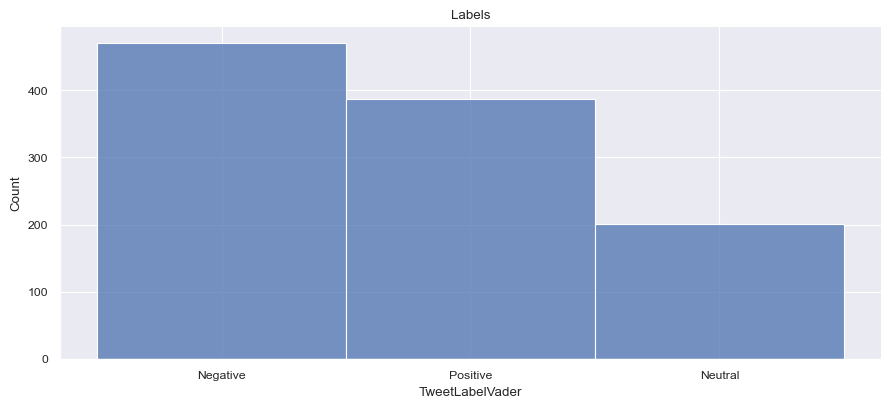

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_context("paper")
sns.displot(df['TweetLabelVader'], height=4, aspect=9/4).set(title="Labels")
plt.show()

In [69]:
dfNegative = df[df['TweetLabelVader'] == 'Negative']

In [70]:
import re # Procesamiento de Texto
from collections import defaultdict
import spacy # Procesamiento NLP
from spellchecker import SpellChecker

# Cargamos los métodos de Spacy en Ingles 
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
spell = SpellChecker() # Corrector ortográfico

replacements = [ # Limpiamos el texto
            '((www\.[^\s]+)|(https?://[^\s]+))', # Limpiamos URL
            '@[^\s]+', # Limpiamos nombres de usuarios
            '#([^\s]+)', # Limpiamos hashtags
            "[^A-Za-z' ]+"  # Eliminamos todo lo que no sea letras
            ]
# Re nos permite compilar varias transformaciones en un solo iterador, 
# así nos evitamos iterar varias veces por el mismo documento, incrementando eficiencia. 
regex = re.compile('|'.join(r for r in replacements),re.IGNORECASE)

def limpia_comments(review, spellchecker=False): 
  """Función para limpiar y pre-procesar tweets. Incluye: 
  - Eliminación de hashtags, urls y usuarios 
  - Tokenización 
  - Corrector gramatical (inglés)
  :param tweet: String, cadena de texto (idealmente un tweet),
  :return: Una lista con tokens del tweet."""
  # Empezamos transformando a minúsculas
  clean_review = str(review).lower()
  # Limpiamos usuarios, URL's y hashtags
  clean_review = regex.sub('', clean_review)
  # Añadimos limpieza de caracteres repetidos
  clean_review = re.sub(r'(.)\1+', r'\1\1', clean_review).split()
  if spellchecker:
    # Encuentra las que tienen errores
    misspelled = spell.unknown(clean_review)
    # Corregimos el tweet
    clean_review = [
        spell.correction(word) if word in misspelled else word for word in clean_review]
  return ' '.join(clean_review)

In [71]:
def cleaning(doc):
  """Lemmatiza y elimina stopwords
  Necesitamos un doc como lo describe spacy
  :param doc: DOC según lo describe Spacy. 
  :return: Una cadena de texto."""
  txt = [token.lemma_ for token in doc if not token.is_stop]
  return ' '.join(txt)
# Funcion de limpieza del tweet que entrará al pipe de Spacy(NLP)
comment_cleaning = (limpia_comments(row) for row in dfNegative['TweetEN'])

In [72]:
from time import time  # Mide el tiempo de ejecución
t = time() # Calculamos el tiempo
txt = [cleaning(doc) for doc in nlp.pipe(comment_cleaning,
                                         batch_size=5000, 
                                         n_process=-1 # Usamos todos los cores
                                         )]
t_ = round((time() - t) / 60, 2) # Obtenemos el tiempo de ejecucion en minutos
print(f'Tiempo de ejecución: {t_} mins')

Tiempo de ejecución: 0.38 mins


In [73]:
dfNegative['TweetClean'] = txt
dfNegative['TweetClean']

C:\Users\Alexander Dueñas\AppData\Local\Temp\ipykernel_5360\3305600160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNegative['TweetClean'] = txt


0       claim payment april appear statement state cha...
1       prove payment bolivarian direct payment immedi...
2       gentleman block account reason bank know yeste...
3       thing happen card analysis enter return debt v...
4                                                    hate
                              ...                        
1051    clone card unrecognized consumption like call ...
1053    misfortune pichincha bank month ago decide ven...
1054    customer ' money day enter twitter meet new co...
1056    ec banking system terrible abusive user orient...
1058    make public complaint yesterday bad service mo...
Name: TweetClean, Length: 471, dtype: object

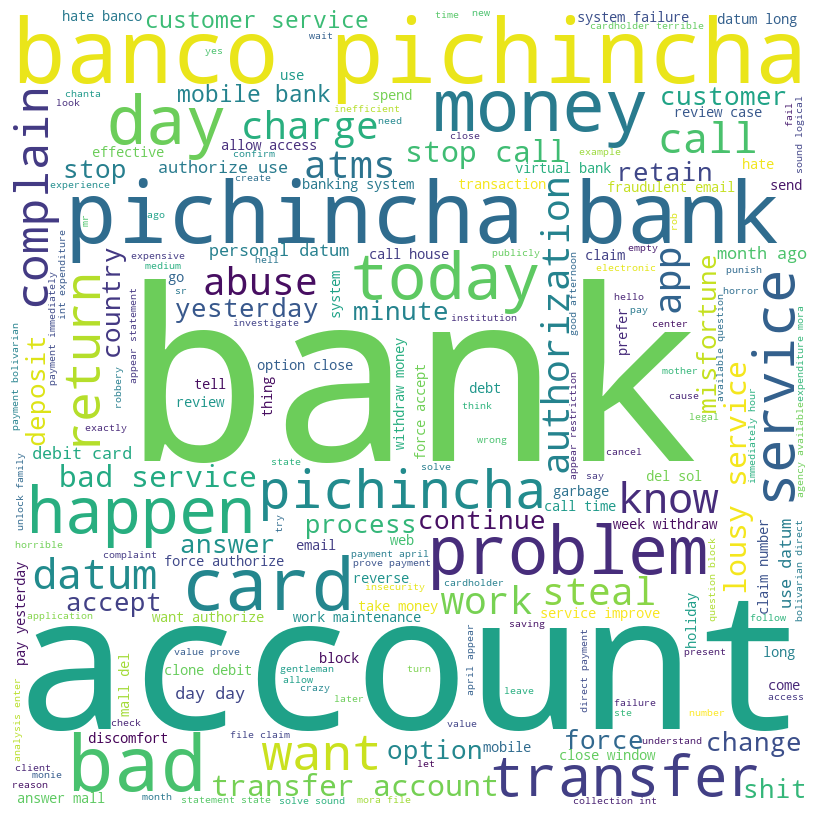

In [74]:
from wordcloud import WordCloud

comment_words = ''

for val in dfNegative['TweetClean']:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)): # Converts each token into lowercase
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [75]:
# Convertimos la columna en múltiples filas
dfNegativeWords  = pd.DataFrame(dfNegative['TweetClean'].str.split(' ', expand=True).stack(), columns=['Words'])
# Filtramos las 15 palabras más repetidas
words = dfNegativeWords.groupby(['Words'])['Words'].count().nlargest(15)
words

Words
bank         177
pichincha    156
account       84
banco         72
service       66
bad           63
day           57
money         57
card          54
call          39
datum         39
problem       39
transfer      39
happen        36
today         36
Name: Words, dtype: int64

<AxesSubplot:title={'center':'Words Frequency'}, xlabel='Words', ylabel='Count'>

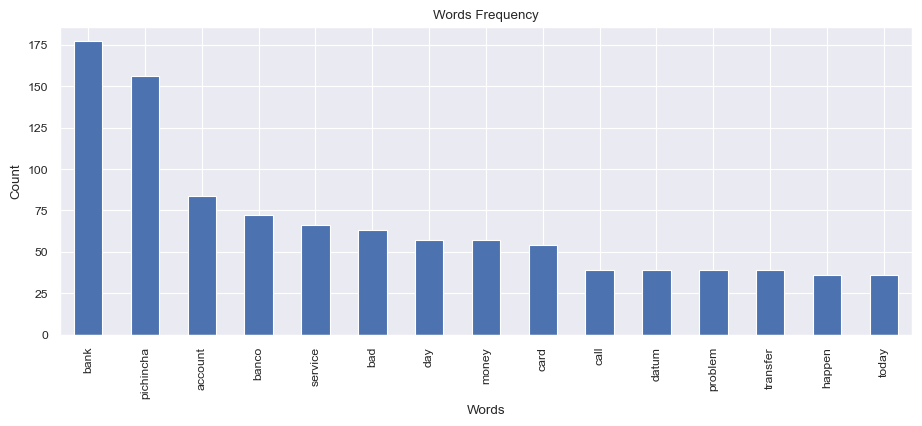

In [76]:
plt.rcParams["figure.figsize"] = (11,4)
plt.ylabel("Count")
dfNegativeWords.groupby(['Words'])['Words'].count().nlargest(15).plot(
kind='bar', title='Words Frequency')

In [78]:
def cleaning(doc):
  """Lemmatiza y elimina stopwords
  Necesitamos un doc como lo describe spacy
  :param doc: DOC según lo describe Spacy. 
  :return: Una cadena de texto."""
  txt = [token.lemma_ for token in doc if not token.is_stop]
  return ' '.join(txt)
# Funcion de limpieza del tweet que entrará al pipe de Spacy(NLP)
comment_cleaning = (limpia_comments(row) for row in df['TweetEN'])

In [79]:
from time import time  # Mide el tiempo de ejecución
t = time() # Calculamos el tiempo
txt = [cleaning(doc) for doc in nlp.pipe(comment_cleaning,
                                         batch_size=5000, 
                                         n_process=-1 # Usamos todos los cores
                                         )]
t_ = round((time() - t) / 60, 2) # Obtenemos el tiempo de ejecucion en minutos
print(f'Tiempo de ejecución: {t_} mins')

Tiempo de ejecución: 0.38 mins


In [80]:
df['TweetClean'] = txt
df['TweetClean']

0       claim payment april appear statement state cha...
1       prove payment bolivarian direct payment immedi...
2       gentleman block account reason bank know yeste...
3       thing happen card analysis enter return debt v...
4                                                    hate
                              ...                        
1054    customer ' money day enter twitter meet new co...
1055    hour ago transfer effective get confirmation m...
1056    ec banking system terrible abusive user orient...
1057    case weekend complaint understand live time ch...
1058    make public complaint yesterday bad service mo...
Name: TweetClean, Length: 1059, dtype: object

In [81]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import gensim.downloader as api

# Phraser une palabras que usualmente están juntas,
# Por ejemplo Big Data -> big_data
sentences  = [row.split() for row in df['TweetClean'] if row]
phrases = Phrases(sentences, min_count=10, progress_per=10000)
bigram = Phraser(phrases)
ngram_sentences = bigram[sentences] 
# Vemos el vocabulario que hemos creado 
# Sanity check 
word_freq = defaultdict(int)
for sent in ngram_sentences:
    for i in sent:
        word_freq[i] += 1
print(f'El corpus tiene {len(word_freq)} palabras') 

El corpus tiene 1084 palabras


In [82]:
# Miramos las palabras más comunes 
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['bank',
 'pichincha',
 'account',
 'banco',
 'money',
 'service',
 'want',
 'day',
 'datum',
 'card']

In [83]:
sorted(
    {w: v for w,v in word_freq.items() if "_" in w},
    key=word_freq.get,
    reverse=True
)[:10]

['force_accept', 'personal_datum', 'processing_personal']

In [84]:
import multiprocessing

cores = multiprocessing.cpu_count() # Cuenta el num de cores disponibles
#  The model (see Gensim's Word2Vec for more info )
w2v_model = Word2Vec(
    min_count=10,  # Num Mínimo de apariciones
    window=2,
    sample=6e-5, 
    alpha=0.03, 
    min_alpha=0.0007, 
    negative=20,       
    workers=cores-1   # A toda maquina
    )
#  Construimos el vocablo para gensim
w2v_model.build_vocab(ngram_sentences, progress_per=10000)

#  Entrenamos el modelo (Toma unos minutos)

w2v_model.train(
    ngram_sentences, 
    total_examples=w2v_model.corpus_count, 
    epochs=30, # Mientras más epochs, más iteraciones de entrenamiento.
    report_delay=1   
    )

(19672, 291960)

In [85]:
# Palabra más similar a banco
w2v_model.wv.most_similar(positive=["pichincha"])

[('good', 0.9993188381195068),
 ('call', 0.9993069171905518),
 ('card', 0.9992919564247131),
 ('block', 0.9992801547050476),
 ('work', 0.9992786645889282),
 ('pay', 0.999277651309967),
 ('force', 0.9992697834968567),
 ('return', 0.9992653727531433),
 ('account', 0.9992607235908508),
 ('bank', 0.9992472529411316)]

In [86]:
# Palabra menos similar a banco
w2v_model.wv.most_similar(negative=["pichincha"])

[('closing', -0.997977614402771),
 ('revoke', -0.9979798793792725),
 ('give', -0.9980802536010742),
 ('tomorrow', -0.9981768131256104),
 ('hate', -0.9981806874275208),
 ('let', -0.9981876015663147),
 ('look', -0.9982588887214661),
 ('lousy', -0.9983024001121521),
 ('unfortunate', -0.9983173608779907),
 ('protect', -0.9983554482460022)]

In [87]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#  Plotting
def tsnescatterplot(model: Word2Vec, word: str, list_names: list):
    """ 
    Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    :param model: A gensim word2vec model. 
    :param word: Keyword to compare to the list_names
    :param list_names: A user defined set list of words to compare to the main word.
    :return: A plot
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 20 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={
                         's': 40,
                         'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(
            df["x"][line],
            df['y'][line],
            '  ' + df["words"][line].title(),
            horizontalalignment='left',
            verticalalignment='bottom', size='medium',
            color=df['color'][line],
            weight='normal'
            ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title(f't-SNE visualization for {word.title()}')
    plt.show();

c:\Users\Alexander Dueñas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Alexander Dueñas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


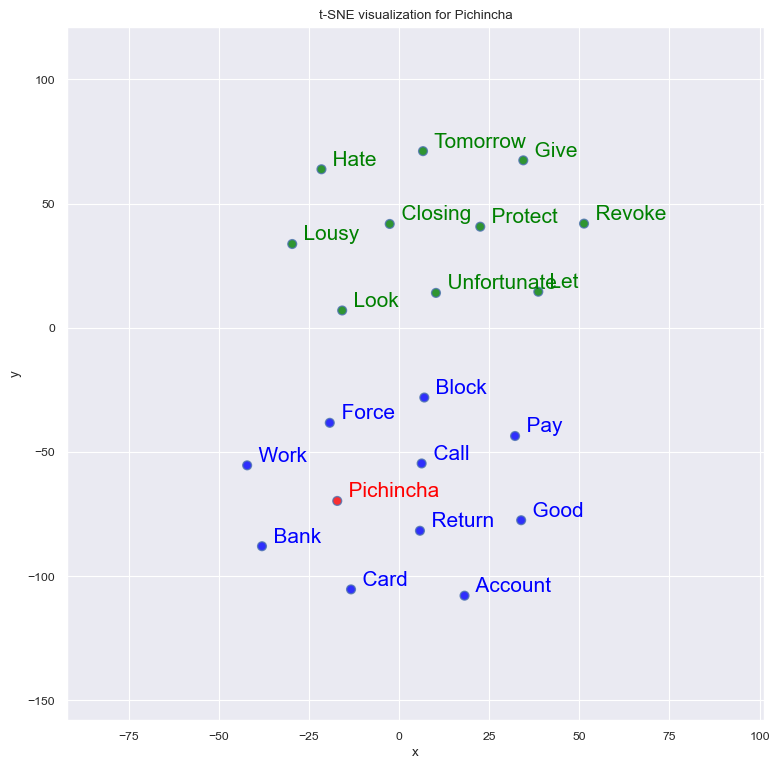

In [88]:
main_word = "pichincha"  # Palabra buscada
alternative_list =  [
    i[0] for i in w2v_model.wv.most_similar(
        negative=[main_word]  # Palabras negativas (opuestas)
        )
    ] 
# Llamamos a nuestra función
#alternative_list
tsnescatterplot(w2v_model, main_word, alternative_list)

In [89]:
import nltk

# Convertimos la columna en múltiples filas
dfWords  = pd.DataFrame(dfNegative['TweetClean'].str.split(' ', expand=True).stack(), columns=['Words'])
bigrams = nltk.bigrams(dfWords['Words'])
dfBigrams = pd.DataFrame(bigrams, columns=['First word','Second word'])
dfBigrams['Bigrams'] = dfBigrams['First word'].str.cat(dfBigrams['Second word'], sep=' ')
dfBigrams

,First word,Second word,Bigrams
0,claim,payment,claim payment
1,payment,april,payment april
2,april,appear,april appear
3,appear,statement,appear statement
4,statement,state,statement state
...,...,...,...
4749,cyber,crime,cyber crime
4750,crime,far,crime far
4751,far,answer,far answer
4752,answer,thank,answer thank


In [90]:
from wordcloud import WordCloud

comment_words = ''

for val in dfNegative['TweetClean']:
    
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)): # Converts each token into lowercase
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

comment_words
 
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 min_font_size = 10).generate(comment_words)
                   
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
# plt.show()

"claim payment april appear statement state charge answer mall del sol answer state return value prove payment bolivarian direct payment immediately hour charge collection int expenditure mora file claim answer mall del sol abuse cardholder terrible gentleman block account reason bank know yesterday confirm datum unlock family account use money inefficient money thing happen card analysis enter return debt value bad hate hello good afternoon account appear restriction money holiday agency available question block customer service number tell solve sound logical owner transfer account investigate block account month review case return happen second time long claim process new card expensive course take money warn case yes holiday disgust today take cashier money give broken ticket horrible banking system lousy service improve process copy good pattern employee ignore triple hp open account pichincha bank number fuck man owe month like banco de gye app prefer pichincha bank shit allow ac

In [91]:
# Filtramos las 15 palabras más repetidas
bigrams = dfBigrams.groupby('Bigrams')['Bigrams'].count().nlargest(15)
bigrams

Bigrams
banco pichincha     69
pichincha bank      63
bad service         12
lousy service       12
stop call           12
transfer account    12
authorize use        9
bank force           9
customer service     9
day day              9
debit card           9
mobile bank          9
month ago            9
personal datum       9
pichincha bad        9
Name: Bigrams, dtype: int64

<AxesSubplot:title={'center':'Words Frequency'}, xlabel='Bigrams', ylabel='Count'>

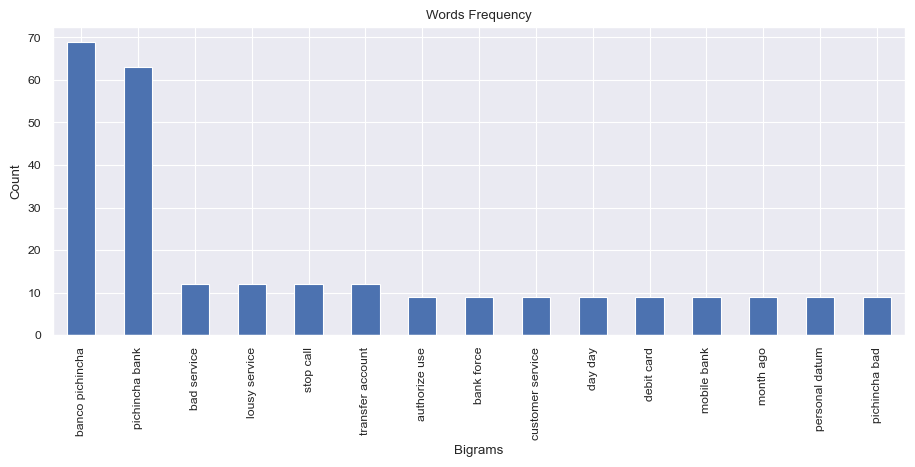

In [92]:
plt.rcParams["figure.figsize"] = (11,4)
plt.ylabel("Count")
dfBigrams.groupby('Bigrams')['Bigrams'].count().nlargest(15).plot(
kind='bar', title='Words Frequency')